<a href="https://colab.research.google.com/github/Ismael-Vasco/Reto_1_IA/blob/main/ttech_reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar los Datos

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
datos = pd.read_csv('dataset_renovables_con_errores.csv')
datos

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


# Exploración de Datos del Dataframe

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Planta Energética                                    1000 non-null   object 
 1   Tipo de Energía                                      929 non-null    object 
 2   Nivel de Democratización Energética                  900 non-null    object 
 3   Número de Comunidades Energéticas                    1000 non-null   object 
 4   Número de Proyectos en Marcha                        810 non-null    float64
 5   Capacidad Generada (MW)                              832 non-null    object 
 6   Reducción de CO2 (toneladas)                         943 non-null    object 
 7   Región                                               938 non-null    object 
 8   Costo de Producción ($/MW)                           1000 non-null   

In [ ]:
datos.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

In [ ]:
datos.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000


In [ ]:
datos.head(5)

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1


In [ ]:
datos['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,145
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112
error,5


In [ ]:
datos['Tipo de Energía'].value_counts()

,count
Tipo de Energía,
Solar,194
Hidráulica,193
Geotérmica,188
Eólica,188
Hidrógeno verde,159
error,7


In [ ]:
datos['Nivel de Democratización Energética'].value_counts()

,count
Nivel de Democratización Energética,
Medio,369
Alto,268
Bajo,257
error,6


In [ ]:
datos['Región'].value_counts()

,count
Región,
Este,246
Sur,238
Oeste,230
Norte,224


In [ ]:
# tipos de datos d elas colimnas
for c in datos.columns:
    print(f'{c}, tipo de datos = {datos[c].dtype}')

Planta Energética, tipo de datos = object
Tipo de Energía, tipo de datos = object
Nivel de Democratización Energética, tipo de datos = object
Número de Comunidades Energéticas, tipo de datos = object
Número de Proyectos en Marcha, tipo de datos = float64
Capacidad Generada (MW), tipo de datos = object
Reducción de CO2 (toneladas), tipo de datos = object
Región, tipo de datos = object
Costo de Producción ($/MW), tipo de datos = float64
Año de Instalación, tipo de datos = int64
Rentabilidad en 10 años (Rentable=1, No Rentable=0), tipo de datos = int64


In [ ]:
# datos objeto
for c in datos.columns:
  if datos[c].dtype == 'object':
    print(c)

Planta Energética
Tipo de Energía
Nivel de Democratización Energética
Región


In [ ]:
# datos float & int
for c in datos.columns:
  if datos[c].dtype == 'float64':
    print(c)
  if datos[c].dtype == 'int64':
    print(c)

Número de Comunidades Energéticas
Número de Proyectos en Marcha
Capacidad Generada (MW)
Reducción de CO2 (toneladas)
Costo de Producción ($/MW)
Año de Instalación
Rentabilidad en 10 años (Rentable=1, No Rentable=0)


In [ ]:
#datos nulos
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


# Imputación de datos númericos

In [ ]:
# imputación de datos numericos con la media
datos['Número de Proyectos en Marcha'].fillna(datos['Número de Proyectos en Marcha'].mean(), inplace=True)

In [ ]:
datos['Número de Proyectos en Marcha'].isnull().sum()

0

In [ ]:
#convertir a int
datos['Número de Comunidades Energéticas'] = pd.to_numeric(datos['Número de Comunidades Energéticas'], errors='coerce')

In [ ]:
datos['Número de Comunidades Energéticas'].isnull().sum()

5

In [ ]:
datos['Número de Comunidades Energéticas'].dtype

dtype('float64')

In [ ]:
# imputar datos
datos['Número de Comunidades Energéticas'].fillna(datos['Número de Comunidades Energéticas'].mean(), inplace=True)

In [ ]:
# Capacidad Generada (MW)
datos['Capacidad Generada (MW)'] = pd.to_numeric(datos['Capacidad Generada (MW)'], errors='coerce')

In [ ]:
datos['Capacidad Generada (MW)'].fillna(datos['Capacidad Generada (MW)'].mean(), inplace=True)

In [ ]:
datos['Capacidad Generada (MW)'].isnull().sum()

0

In [ ]:
# Reducción de CO2 (toneladas)
datos['Reducción de CO2 (toneladas)'] = pd.to_numeric(datos['Reducción de CO2 (toneladas)'], errors='coerce')

In [ ]:
datos['Reducción de CO2 (toneladas)'].isnull().sum()

61

In [ ]:
datos['Reducción de CO2 (toneladas)'].fillna(datos['Reducción de CO2 (toneladas)'].mean(), inplace=True)

In [ ]:
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


# Imputación de datos categoricos

In [ ]:
# imputación para Tipo de energia
datos['Tipo de Energía'].unique()

array(['Solar', 'Geotérmica', 'Hidrógeno verde', 'Hidráulica', 'Eólica'],
      dtype=object)

In [ ]:
datos['Tipo de Energía'] = datos['Tipo de Energía'].replace(["nan", 'error'], np.nan)

In [ ]:
datos[datos['Planta Energética']== 'error'] = datos[datos['Planta Energética']== 'error'] = np.nan

In [ ]:
datos['Tipo de Energía'].isnull().sum()

0

In [ ]:
datos['Tipo de Energía'].fillna(datos['Tipo de Energía'].mode()[0], inplace=True)

In [ ]:
# imputación para Nivel de Democratización Energética
datos['Nivel de Democratización Energética'].unique()

array(['Alto', 'Bajo', nan, 'Medio', 'error'], dtype=object)

In [ ]:
datos['Nivel de Democratización Energética'] = datos['Nivel de Democratización Energética'].replace(["nan", 'error'], np.nan)

In [ ]:
datos['Nivel de Democratización Energética'].isnull().sum()

106

In [ ]:
datos['Nivel de Democratización Energética'].fillna(datos['Nivel de Democratización Energética'].mode()[0], inplace=True)

In [ ]:
#imputación para Región
datos['Región'].unique()

array(['Sur', 'Oeste', 'Este', 'Norte', nan], dtype=object)

In [ ]:
#for i in datos['Región']:
#    if i not in ['Sur', 'Oeste', 'Este', 'Norte']:
#      datos[datos['Región']== i] = np.nan

In [ ]:
datos['Región'].fillna(datos['Región'].mode()[0], inplace=True)

In [ ]:
datos.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,0
Nivel de Democratización Energética,0
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,0
Costo de Producción ($/MW),0
Año de Instalación,0


In [ ]:
datos.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,27.523618,10.262963,494.468248,240099.515545,2620.846302,2012.175000,0.58400
std,13.001432,4.902144,260.617295,135578.147382,653.454384,5.605872,0.49314
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,2005.000000,0.00000
25%,16.000000,7.000000,299.587500,127118.370200,2044.109301,2005.000000,0.00000
50%,27.523618,10.262963,494.468248,240099.515545,2620.846302,2010.000000,1.00000
75%,39.000000,14.000000,692.315000,356309.488282,3197.583303,2015.000000,1.00000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,2020.000000,1.00000


In [ ]:
datos.tail(10)

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
990,WindStream,Solar,Bajo,41.0,13.000000,715.540000,348372.349577,Este,1943.807214,2010,0
991,SunWave,Solar,Bajo,12.0,10.262963,201.230000,97972.116032,Este,3398.187477,2005,0
992,WindStream,Geotérmica,Alto,11.0,8.000000,476.600000,232040.503408,Oeste,3448.338521,2005,0
993,SunWave,Solar,Medio,18.0,7.000000,477.790000,232619.874367,Este,3097.281216,2020,1
994,SunWave,Geotérmica,Medio,7.0,10.262963,384.440000,187170.900399,Este,3648.942695,2010,0
995,EcoWind,Hidrógeno verde,Bajo,20.0,10.262963,522.120000,254202.659755,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23.0,7.000000,494.468248,203987.264200,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22.0,10.262963,207.350000,100951.738107,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20.0,16.000000,418.240000,240099.515545,Este,2996.979129,2015,1
999,HydroFlux,Eólica,Medio,12.0,3.000000,494.468248,39703.951013,Sur,3398.187477,2005,1


# Generación de Estadísticas Descriptivas

In [ ]:
datos.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,27.523618,10.262963,494.468248,240099.515545,2620.846302,2012.175000,0.58400
std,13.001432,4.902144,260.617295,135578.147382,653.454384,5.605872,0.49314
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,2005.000000,0.00000
25%,16.000000,7.000000,299.587500,127118.370200,2044.109301,2005.000000,0.00000
50%,27.523618,10.262963,494.468248,240099.515545,2620.846302,2010.000000,1.00000
75%,39.000000,14.000000,692.315000,356309.488282,3197.583303,2015.000000,1.00000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,2020.000000,1.00000


# cuantitativos

In [ ]:
# Datos numericos
# Número de Comunidades Energéticas
# Número de Proyectos en Marcha
# Capacidad Generada (MW)
# Reducción de CO2 (toneladas)
# Costo de Producción ($/MW)
# Año de Instalación
# Rentabilidad en 10 años (Rentable=1, No Rentable=0)

In [ ]:
#meadiana
#mediana1 = np.median(datos['Número de Proyectos en Marcha'])
#print(f'mediana del Número de Proyectos en Marcha {mediana1}')
mediana1 = np.median(datos['Número de Comunidades Energéticas'])
print(f'mediana del Número de Comunidades Energéticas {mediana1}')

mediana2 = np.median(datos['Costo de Producción ($/MW)'])
print(f'mediana del Costo de Producción ($/MW) {mediana2}')

mediana3 = np.median(datos['Año de Instalación'])
print(f'mediana del Año de Instalación {mediana3}')

mediana4 = np.median(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
print(f'mediana de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {mediana4}')

mediana5 = np.median(datos['Número de Proyectos en Marcha'])
print(f'mediana del Número de Proyectos en Marcha {mediana5}')

mediana6 = np.median(datos['Capacidad Generada (MW)'])
print(f'mediana del Capacidad Generada (MW) {mediana6}')

mediana7 = np.median(datos['Reducción de CO2 (toneladas)'])
print(f'mediana del Reducción de CO2 (toneladas) {mediana7}')

mediana del Número de Comunidades Energéticas 27.52361809045226
mediana del Costo de Producción ($/MW) 2620.846301885278
mediana del Año de Instalación 2010.0
mediana de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 1.0
mediana del Número de Proyectos en Marcha 10.262962962962963
mediana del Capacidad Generada (MW) 494.4682481751825
mediana del Reducción de CO2 (toneladas) 240099.51554517832


In [ ]:
#moda
moda1 = datos['Número de Proyectos en Marcha'].mode()
print(f'moda del Número de Proyectos en Marcha {moda1[0]} \n')

moda2 = datos['Costo de Producción ($/MW)'].mode()
print(f'moda del Costo de Producción ($/MW) {moda2[0]} \n')

moda3 = datos['Año de Instalación'].mode()
print(f'moda del Año de Instalación {moda3[0]} \n')

moda4 = datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].mode()
print(f'moda de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {moda4[0]} \n')

moda5 = datos['Número de Comunidades Energéticas'].mode()
print(f'moda del Número de Comunidades Energéticas {moda5[0]} \n')

moda6 = datos['Capacidad Generada (MW)'].mode()
print(f'moda del Capacidad Generada (MW) {moda6[0]} \n')

moda7 = datos['Reducción de CO2 (toneladas)'].mode()
print(f'moda del Reducción de CO2 (toneladas) {moda7[0]}')

moda del Número de Proyectos en Marcha 10.262962962962963 

moda del Costo de Producción ($/MW) 2946.8280850760307 

moda del Año de Instalación 2005 

moda de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 1 

moda del Número de Comunidades Energéticas 21.0 

moda del Capacidad Generada (MW) 494.4682481751825 

moda del Reducción de CO2 (toneladas) 240099.51554517832


In [ ]:
#varianza
varianza1 = np.var(datos['Número de Proyectos en Marcha'])
print(f'varianza del Número de Proyectos en Marcha {varianza1}')

varianza2 = np.var(datos['Costo de Producción ($/MW)'])
print(f'varianza del Costo de Producción ($/MW) {varianza2}')

varianza3 = np.var(datos['Año de Instalación'])
print(f'varianza del Año de Instalación {varianza3}')

varianza4 = np.var(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
print(f'varianza de Rentabilidad en 10 años (Rentable=1, No Rentable=0) {varianza4}')

varianza5 = np.var(datos['Número de Comunidades Energéticas'])
print(f'varianza del Número de Comunidades Energéticas {varianza5}')

varianza6 = np.var(datos['Capacidad Generada (MW)'])
print(f'varianza del Capacidad Generada (MW) {varianza6}')

varianza7 = np.var(datos['Reducción de CO2 (toneladas)'])
print(f'varianza del Reducción de CO2 (toneladas) {varianza7}')


varianza del Número de Proyectos en Marcha 24.006988888888888
varianza del Costo de Producción ($/MW) 426575.6287001388
varianza del Año de Instalación 31.394375
varianza de Rentabilidad en 10 años (Rentable=1, No Rentable=0) 0.242944
varianza del Número de Comunidades Energéticas 168.86819497487437
varianza del Capacidad Generada (MW) 67853.45291067737
varianza del Reducción de CO2 (toneladas) 18363052613.53781


# Cualitativos

In [ ]:
#Planta Energética
#Tipo de Energía
#Nivel de Democratización Energética
#Región

In [ ]:
datos['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,145
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112


<function matplotlib.pyplot.show(close=None, block=None)>

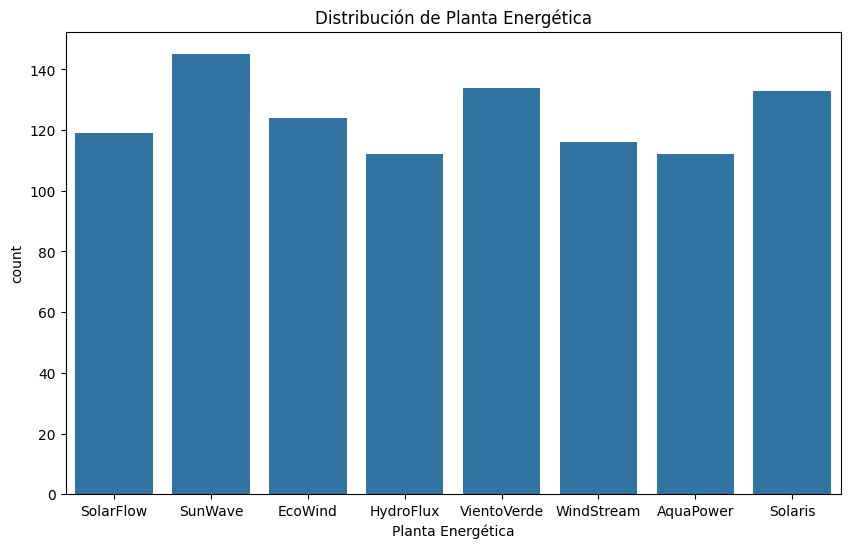

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Planta Energética', data=datos)
plt.title('Distribución de Planta Energética')
plt.show

NameError: name 'y' is not defined

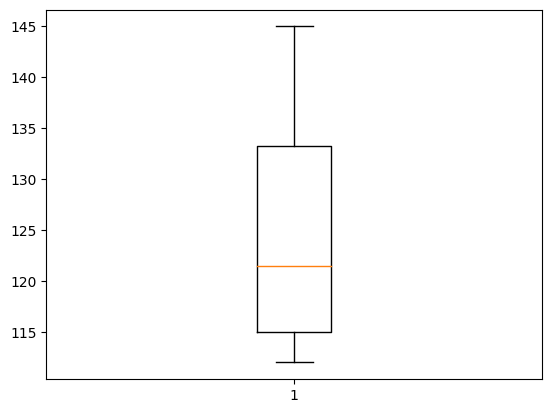

In [ ]:
plt.boxplot(datos['Planta Energética'].value_counts())
y.set_title(datos['Planta Energética'].unique())
plt.show()

In [ ]:
datos['Tipo de Energía'].unique()

array(['Solar', 'Geotérmica', 'Hidrógeno verde', 'Hidráulica', 'Eólica'],
      dtype=object)

5

# Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión

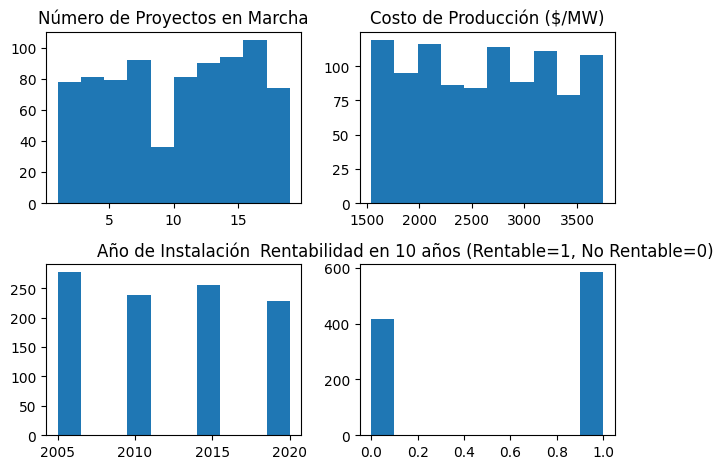

In [ ]:
# hist
plt.subplot(2, 2, 1)
plt.hist(datos['Número de Proyectos en Marcha'])
plt.title('Número de Proyectos en Marcha')

plt.subplot(2, 2, 2)
plt.hist(datos['Costo de Producción ($/MW)'])
plt.title('Costo de Producción ($/MW)')

plt.subplot(2, 2, 3)
plt.hist(datos['Año de Instalación'])
plt.title('Año de Instalación')

plt.subplot(2, 2, 4)
plt.hist(datos['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])
plt.title('Rentabilidad en 10 años (Rentable=1, No Rentable=0)')

plt.tight_layout()
plt.show()

In [ ]:
# DATOS ORDINALES
# Planta Energética
# Tipo de Energía
# Nivel de Democratización Energética
# Número de Comunidades Energéticas
# Capacidad Generada (MW)
# Reducción de CO2 (toneladas)
# Región

In [ ]:
ejes = plt.axes()
plt.subplot(2,2,1)
plt.bar(datos['Planta Energética'].unique(), datos[].value_counts())
plt

# Identificación y manejo de valores atípicos y tendencias en los datos

# Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.

# Eliminación de registros con datos faltantes o imputación de valores categóricos.

# Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.

# Cálculo y visualización de matrices de correlación.

# Aplicación de PCA para reducir la dimensionalidad de datasets